<a href="https://colab.research.google.com/github/jevabrir/Predicc_Millas_VS_galon_RedNeur_vs_RegMult/blob/main/Proy_Estad%C3%ADstica_UVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicción del precio de Autos**

---
    

El objetivo de este proyecto es mostrar el procedimiento para generar un modelo de regresión lineal múltiple para estimar el **el precio de un automóvil** utilizando la información del dataset CarPrice_Assignment.csv disponible en el enlace siguiente:


https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data


En este script se muestra un ejemplo utilizando el método de

*  **Regresión lineal múltiple**

Es importante mencionar que el objetivo del proyecto sólo es mostrar el procedimiento para diseñar un modelo de regresión múltiple, sin embargo, no se realizaron ajustes en el modelo para obtener la mejor estimación.

## **1. Liberías**
#### Carga de algunas de las librerías utilizadas en el proyecto

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **2.Creación del dataframe completo**  

Creación del dataframe a partir del conjunto de datos "auto-mpg". Este conjunto de datos contiene información sobre diversos aspectos de automóviles. Las columnas que tiene son las siguientes:  

*   **Mpg:** Millas por galón (consumo de combustible).
*   **Cylinders:** Número de cilindros.
*   **Displacement:** Desplazamiento del motor (pulgadas cúbicas).
*   **Horsepower:** Potencia (caballos de fuerza).
*   **Weight:** Peso del automóvil (libras).
*   **Acceleration:** Aceleración (tiempo que tarda en alcanzar los 60 mph desde el reposo, en segundos).
*   **Model year:** Año del modelo.
*   **Origin:** Origen del automóvil (1: USA, 2: Europa, 3: Japón).


In [ ]:
import pandas as pd

df_CarPrice = pd.read_csv('CarPrice_Assignment.csv')   # Lee el df de un archivo csv

print("El tamaño del dataset es: ",df_CarPrice.shape)  # Imprime el tamaño del df
df_CarPrice.head(3)                                    # Imprime 3 primeras líneas del df

El tamaño del dataset es:  (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [ ]:
df_CarPrice.info()      # Imprime información del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### **2.1Creación del dataframe del proyecto**  

El objetivo del proyecto es estimar el precio de los autos (estimar la variable **price**) en función de dos variables  

**Variable dependiente y**  
*   **price**			Price of car  

Cada equipo seleccionara dos variables de la siguiente lista para realizar su trabajo

**Variables independientes x**  

*   **wheelbase**			Weelbase of car
*   **carlength**			Length of car
*   **carwidth**		  Width of car
*   **carheight**			height of car
*   **curbweight**		The weight of a car without occupants or baggage.
*   **enginesize**		Size of car
*   **boreratio**		   Boreratio of car
*   **stroke**				Stroke or volume inside the engine
*   **compressionratio**		Compression ratio of car
*   **horsepower**			Horsepower
*   **peakrpm**			    car peak rpm
*   **citympg**			    Mileage in city
*   **highwaympg**			Mileage on highway


In [ ]:
# Craer un df nuevo con tres variables adicionales a price, recuerda que 'price' se queda porque es la
# variable que desamos predecir

df_CarPrice_Reg=df_CarPrice[['price','wheelbase','boreratio','citympg']]  # Genera nuevo Df sólo con 4 columnas
print(df_CarPrice_Reg.shape)
df_CarPrice_Reg.head(3)

(205, 4)


,price,wheelbase,boreratio,citympg
0,13495.0,88.6,3.47,21
1,16500.0,88.6,3.47,21
2,16500.0,94.5,2.68,19


## **3.Análisis exploratorio**  

En esta parte se muestran los estadísticos del df con los datos cargados del archivo auto-mpg.data.

In [ ]:
df_CarPrice_Reg.describe().transpose()       # Genera los estadísticos del df (muestra en forma transpuesta)

,count,mean,std,min,25%,50%,75%,max
price,205.0,13276.710571,7988.852332,5118.00,7788.00,10295.00,16503.00,45400.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
citympg,205.0,25.219512,6.542142,13.00,19.00,24.00,30.00,49.00


Con el objetivo de conocer la distribución de las variables, se realiza la visualización de los datos para cada variable númerica mediante un histográma y una gráfica de dispersión del conjunto de datos.

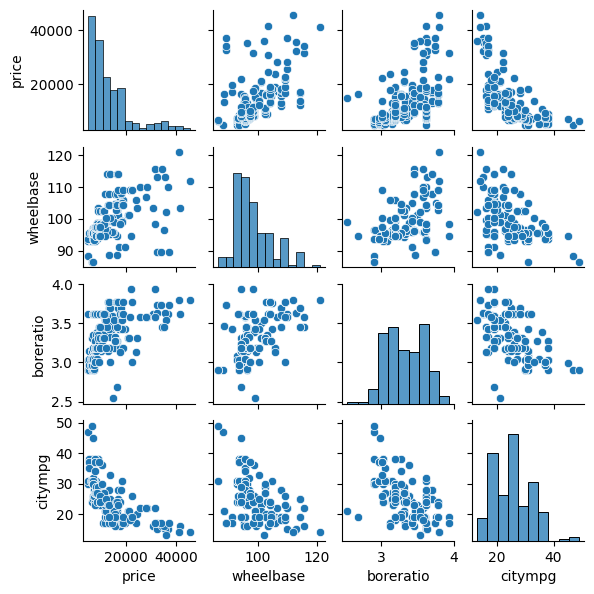

In [ ]:
sns.pairplot(df_CarPrice_Reg,      # Nombre del dataframe
             diag_kind="hist",     # Tipo de gráfico en la diagonal
             height=1.5)           # ALtura del gráfico

* Requieren generar el histograma de las otras dos variables

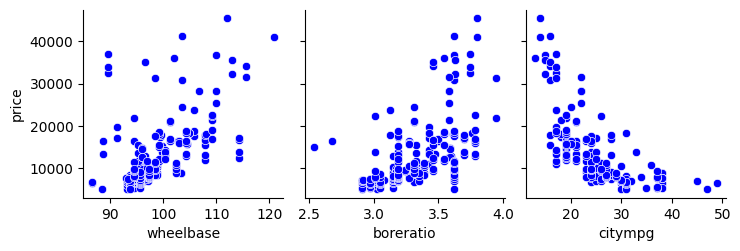

## **4.Análisis coeficiente de correlación**  

El coeficiente de correlación se calcula para medir la relación entre dos variables y determinar qué tan fuerte y en qué dirección están relacionadas.

In [ ]:
## Exploración de datos: Matriz de correlación
my_corr = df_CarPrice_Reg.corr()
my_corr.head(10)

,price,wheelbase,boreratio,citympg
price,1.000000,0.577816,0.553173,-0.685751
wheelbase,0.577816,1.000000,0.488750,-0.470414
boreratio,0.553173,0.488750,1.000000,-0.584532
citympg,-0.685751,-0.470414,-0.584532,1.000000


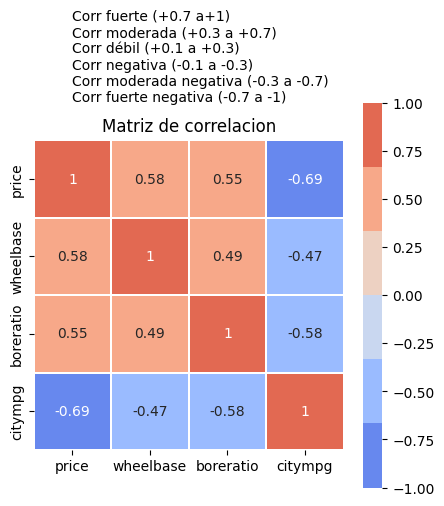

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(my_corr, annot=True, square=True,
            cmap=sns.color_palette("coolwarm"),
            vmax=1,
            vmin=-1,
           linewidths=0.3)
plt.title("Matriz de correlacion")
plt.text(0.5,-0.5, "Corr fuerte (+0.7 a+1)\nCorr moderada (+0.3 a +0.7)\nCorr débil (+0.1 a +0.3)\nCorr negativa (-0.1 a -0.3)\nCorr moderada negativa (-0.3 a -0.7)\nCorr fuerte negativa (-0.7 a -1)")
plt.show()

📌 Interpretación de los signos de los coeficientes:  
*  **Coeficiente positivo:** A medida que la variable independiente aumenta, la variable dependiente también tiende a aumentar.  

*  **Coeficiente negativo:** A medida que la variable independiente aumenta, la variable dependiente tiende a disminuir.

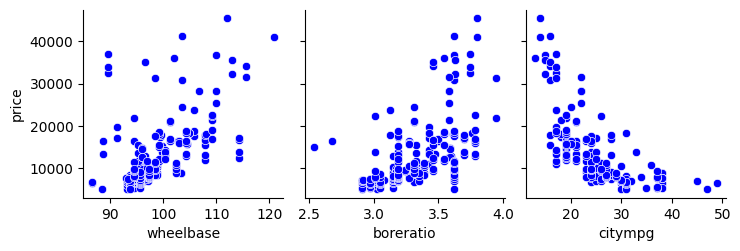

In [ ]:
# Visualización de los datos

Var_Depen_X=['wheelbase','boreratio','citympg']
Var_Indep_Y =['price']
g = sns.pairplot(df_CarPrice_Reg, x_vars=Var_Depen_X, y_vars=Var_Indep_Y, height=2.5, plot_kws={'color': 'blue'})

## **5. Modelo de predicción**  

En esta parte se generan el modelo para estimar el precio.

### **5.2 Datos entrenamiento y prueba**  

Los modelos de aprendizaje automático requieren dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Esto permite evaluar el rendimiento del modelo de manera adecuada, asegurando que no se sobreajuste a los datos de entrenamiento. En esta etapa se requiere definir a las variables independientes y dependientes:

**y** = Variable a estimar, precio en USD de los autos  
**x** = Varaibles de entrada, atributos o características a utilizar para estimar el precio y son ....

In [ ]:
from sklearn.model_selection import train_test_split

y = df_CarPrice_Reg['price']                 # Variable de salida 'price' (y= precio)
X = df_CarPrice_Reg.drop(columns='price')    # Variables de entrada (feaures)

# Separa en conjuntos de entrenamiento (80%) y prueba(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print("Tamaño de X y y    :", X.shape, y.shape)
print("Tamaño de X_train  :", X_train.shape)
print("Tamaño de X_test   :", X_test.shape)
print("Tamaño de y_train  :", y_train.shape)
print("Tamaño de y_test   :", y_test.shape)

Tamaño de X y y    : (205, 3) (205,)
Tamaño de X_train  : (164, 3)
Tamaño de X_test   : (41, 3)
Tamaño de y_train  : (164,)
Tamaño de y_test   : (41,)


### **5.1 Modelo Regresión Múltiple**  

El código siguiente implementa un modelo de Regresión Lineal Múltiple para estimar el consumo de combustible utilizando **scikit-learn**. Los pasos para generar un modelo de regresión final múltiple son:

*  **1. Ajuste del modelo (model_LR.fit())**
*  **2. Obtención de los coeficientes e intersección**
*  **3. Despliegue de la ecuación de la regresión**
*  **4. Predicción de valores (model_LR.predict())**
*  **5. Cálculo de métricas de error**


#### **5.5.1. Creación y Ajuste del modelo (model_LR.fit())**
Para la creación y ajuste de un modelo de regresión se requiere crear una una instancia del modelo de regresión lineal (LinearRegression()) y posteriormente se ajusta el modelo a los datos de entrenamiento X_train_scaled y y_train con **model_LR.fit()**. Esto hace que el modelo aprenda los coeficientes de la ecuación lineal.

Los parámetros clave de LinearRegression en scikit-learn son:

**CREACIóN DEL MODELO**

**model_LR = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=True)**

*  **fit_intercept=** True: Ajustará una intersección (ordenada al origen) al modelo, lo que significa que permitirá que la línea de regresión tenga un valor distinto de 0 cuando todas las variables independientes sean 0.
*  **copy_X=** True: Garantiza que los datos originales no sean sobrescritos.
*  **n_jobs=-1:** Utiliza todas las CPUs disponibles para hacer más eficiente el ajuste del modelo en caso de que los datos sean grandes.
*  **positive=True:** Obligará a los coeficientes a ser no negativos, lo cual puede ser útil en algunos casos donde las variables solo tienen sentido físico con coeficientes positivos.

**model_LR.fit(X_train_scaled, y_train)**

Este método recibe los siguientes parámetros principales:

*  **X_train_scaled:** conjunto de datos de entrada (o características) que han sido escalados o normalizados para mejorar el rendimiento del modelo.
*  **y_train:** conjunto de valores objetivo (o etiquetas) asociados a los datos de entrenamiento. Este es el valor que el modelo intentará predecir con base en las características de entrada.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Crea el modelo de regresión lineal
model_LR = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=True)

# Ajusta el modelo con los datos de entrenamiento
model_LR.fit(X_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

#### **5.5.2. Obtención de los coeficientes e intersección**
Después de ajustar el modelo, se obtienen los coeficientes y la intersección:

*  **model_LR.coef_:** Devuelve los coeficientes de la regresión lineal, es decir, las pendientes para cada variable.

*  **model_LR.intercept_:** Devuelve la intersección, el valor de y cuando todas las variables independientes son 0.

In [ ]:
# Obtiene los coeficientes y los nombres de las características
coefficients = model_LR.coef_
feature_names = X.columns

# Crea el DataFrame con los nombres de las características y los coeficientes
df_coefficients = pd.DataFrame({
    'Caracteristicas': feature_names,
    'Coeficientes': coefficients
})

print("Ordenada al origen del modelo :",model_LR.intercept_)
df_coefficients

Ordenada al origen del modelo : -67654.72979452185


,Caracteristicas,Coeficientes
0,wheelbase,430.593857
1,boreratio,11553.110879
2,citympg,0.000000


#### **5.5.3. Despliegue de la ecuación de la regresión**
El código construye y muestra la ecuación de la regresión lineal múltiple utilizando los coeficientes e intersección. Si X_train_scaled es un DataFrame de pandas, los nombres de las columnas se extraen de allí; si es un array de NumPy, se generan nombres genéricos como X1, X2, etc.

In [ ]:
# Despliega ecuación de regresión con los coeficientes originales (sin normalización)
# Calcula la media y la desviación estándar de las características originales
means = X_train.mean()
stds = X_train.std()

# Coeficientes del modelo ajustado
coefficients = model_LR.coef_
intercept = model_LR.intercept_

# Revierte la normalización de los coeficientes
original_coefficients = coefficients * stds.values
original_intercept = intercept - sum((means * original_coefficients))

# Despliega la ecuación de la regresión lineal en la escala original
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'X{i+1}' for i in range(X_train.shape[1])]

print("Ecuación de la regresión lineal múltiple (coeficientes originales):")
equation = "y = {:.4f}".format(original_intercept)
for coef, feature in zip(original_coefficients, feature_names):
    equation += " + {:.4f}*{}".format(coef, feature)

print(equation)

Ecuación de la regresión lineal múltiple (coeficientes originales):
y = -331753.5395 + 2570.1649*wheelbase + 3116.6323*boreratio + 0.0000*citympg


#### **5.5.4. Predicción de valores (model_LR.predict())**
Después de ajustar el modelo, se puede realizar las predicciones sobre los datos de prueba X_test_scaled con **model_LR.predict()**. Esto genera un array con los valores predichos y_pred_LR, que luego se comparan con los valores reales y_test.

In [ ]:
# Evaluar el modelo en los datos de prueba
y_pred_LR = model_LR.predict(X_test)

In [ ]:
y_pred_LR

array([18733.99581106, 11350.59605133, 12670.85235557, 15915.13396894,
       21070.73144785,  9428.6889828 , 11331.77491698, 10407.52604663,
       15935.13573911,  9016.91625993, 12431.31717559,  9890.81341797,
       20954.26273427, 14678.87819555, 28305.88888502,  8790.09052354,
        4029.31984271, 14999.35806099, 12514.38010165, 16021.25451055,
       14052.98917988, 15204.06378661,  9687.04529713,  3254.25089971,
        7004.65393875, 18733.99581106, 16537.96713922, 20926.96863752,
        9428.6889828 , 20926.96863752, 21070.73144785,  7004.65393875,
        8790.09052354, 20683.19697634,  7396.42489145, 19649.77171901,
       15935.13573911, 11852.72402684,  8042.31567728, 15114.88916978,
       15935.13573911])

#### **5.5.5. Cálculo de métricas de error con datos Prueba**
El código utiliza dos métricas clave para evaluar el rendimiento del modelo:

Error Absoluto Medio (MAE): Evalúa el promedio de las diferencias absolutas entre los valores predichos y los valores reales.

In [ ]:
# Evalua el modelo en los datos de prueba
y_pred_LR = model_LR.predict(X_test)

# Calcula el Absoluto Medio (MAE) y el coeficiente de determinación
mae = mean_absolute_error(y_test, y_pred_LR)
r2_score = model_LR.score(X_test, y_test)

# Muestra el MSE, MAE y R^2
print("\n Resultados Validación Modelo Regresión Lineal Multiple: ***datos de prueba***")
print("\n   MAE Error Absoluto Medio          : {:5.2f}".format(mae))
print("   R^2 Coeficiente de determinación    : {:5.2f}".format(r2_score))


 Resultados Validación Modelo Regresión Lineal Multiple: ***datos de prueba***

   MAE Error Absoluto Medio          : 4265.61
   R^2 Coeficiente de determinación    :  0.54


## **6. Resultado del Modelo**

In [ ]:
Res_test = X_test.copy()                # Hacer una copia de X_test
Res_test["price_Real"] = y_test
Res_test["price_Esti"] = y_pred_LR
Res_test.head(5)

,wheelbase,boreratio,citympg,price_Real,price_Esti
15,103.5,3.62,16,30760.000,18733.995811
9,99.5,3.13,16,17859.167,11350.596051
100,97.2,3.33,27,9549.000,12670.852356
132,99.1,3.54,21,11850.000,15915.133969
68,110.0,3.58,22,28248.000,21070.731448


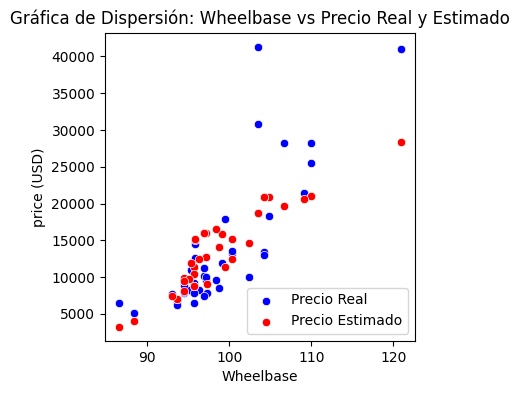

In [ ]:
# Crear la gráfica
plt.figure(figsize=(4, 4))
sns.scatterplot(x=Res_test['wheelbase'], y=Res_test['price_Real'], color='blue', label='Precio Real')
sns.scatterplot(x=Res_test['wheelbase'], y=Res_test['price_Esti'], color='red', label='Precio Estimado')

# Configurar la gráfica
plt.xlabel('Wheelbase')
plt.ylabel('price (USD)')
plt.title('Gráfica de Dispersión: Wheelbase vs Precio Real y Estimado')
plt.legend()
plt.grid(False)

# Mostrar la gráfica
plt.show()